#### House Price Prediction 🏠
- Analysing the factors that influences the house and building a predictive model

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Import the dataframe
df = pd.read_csv('../Datasets/House Price Prediction/Housing.csv')

In [3]:
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


#### Observation
- **First Row:** Has 4 bedrooms, 2 bathrooms, 3 stories, situated at main road, has no guestroom and basement. Doesn't have water heating facility, comes with 2 parking area / slots.

  **Type: Furnished**

  -  **Second Row:** Has 4 bedrooms, 4 bathrooms, 4 stories, situated at main road, has no guestroom and basement. Doesn't have water heating facility, comes with 3 parking area / slots.
    
    **Type: Furnished**

#### Commonality
  -  All 6 houses are situated at main road, no hotwaterheating



In [4]:
#Let's check if we have any missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Observation
- Our dataset is clean

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### About Data Types
- **Numerical Categories:** Price, area, bedrooms,bathrooms,stories,parking
  
- **Categorical Categories:** mainroad,guestroom,basement,hotwaterheating,airconditioning 

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Observation

**About The Numbers**
- We have 545 data count
- No Null Counts

**Area**
- Assuming the measurement of the area is square feet (sqft)
- On Average the sqft of the area is 5150 sqft
- Minimum is 1650 sqft and maximum is 16200 sqft
- Most of the houses fall 2760 sqft

**Bedrooms**
- On Average, it's 2 bedrooms
- Minimum of 1 bedrooms, maximum of 5 bedrooms
- Median of the dataset contains 3 bedrooms
- Most of the houses have 1 bedroom

**Bathrooms**
- On Average, the dataset contains 1 bathroom
- Every house have atleast one bathroom
- 25% - 50% of the dataset contains 1 bathroom which suggests that our dataset contains most houses with one bathroom
- On occation of rarity, we can see 2 bathrooms

**Stories**
- On Average, one storied building
- Every house is atleast one storied building

**Parking**
- Most of the house lacks parking space
- 1/3 houses has one parking space

#### Data Visualization

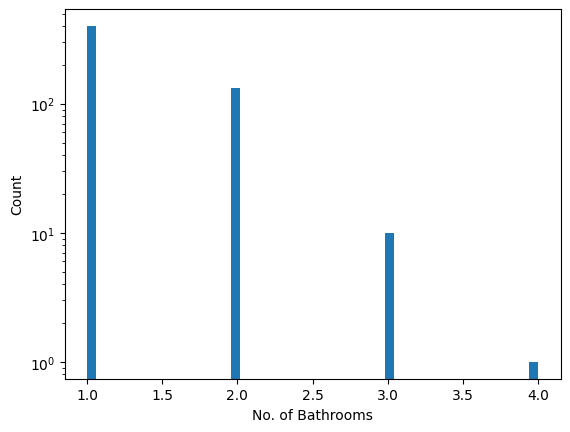

In [7]:
plt.hist(df['bathrooms'],bins=50,log=True)
plt.xlabel('No. of Bathrooms')
plt.ylabel('Count')
plt.show()

##### Observation
- Around 400 houses with one bathroom
- Around 130 houses with two bathrooms
- Around 20 houses with three bathrooms
- Around one or two houses with four bathrooms

Text(0, 0.5, 'Count')

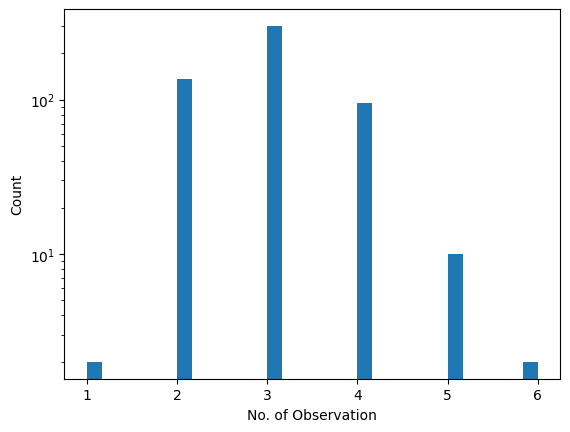

In [8]:
## bathrooms
plt.hist(df['bedrooms'],bins=30,log=True)
plt.xlabel('No. of Observation')
plt.ylabel('Count')

#### Observation
- There are  500 double bedrooms
- There is 1 single bedroom
- There are 400 triple bedrooms
- Around 10 5-sized bedrooms
- Around 12 6-sized bedrooms

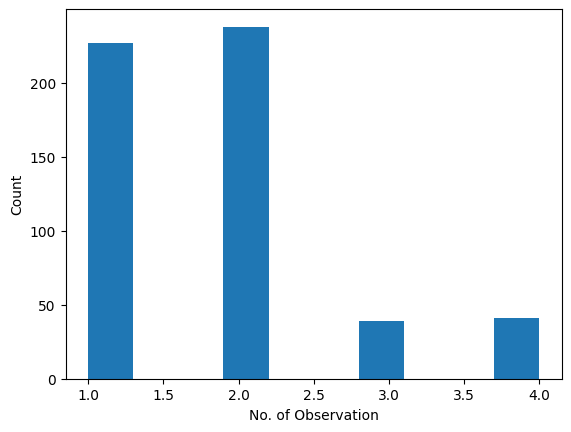

In [9]:
plt.hist(df['stories'])
plt.xlabel('No. of Observation')
plt.ylabel('Count')
plt.show()

##### Observation

1 storyed building
- **Count: 250**

2 storied building
- **Count: 270**

3 storied building
- **Count: 40**

4 storied building
- **Count:38**

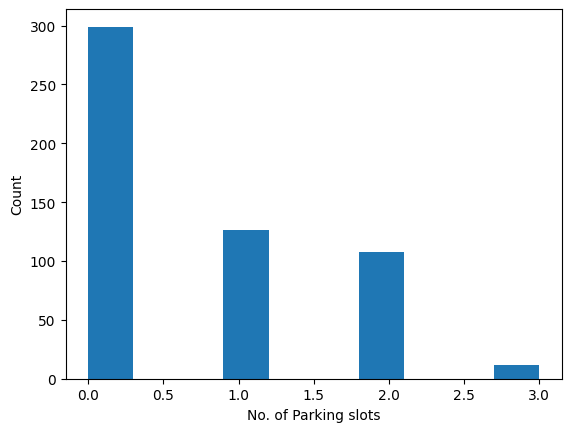

In [10]:
plt.hist(df['parking'])
plt.xlabel('No. of Parking slots')
plt.ylabel('Count')
plt.show()

#### Observation
- Suprisingly, most of the houses doesn't have a parking slot
- Around 135 houses have one parking slot
- 100 houses have 2 parking slots
- 20 houses have 3 parking slots

airconditioning
0    373
1    172
Name: count, dtype: int64


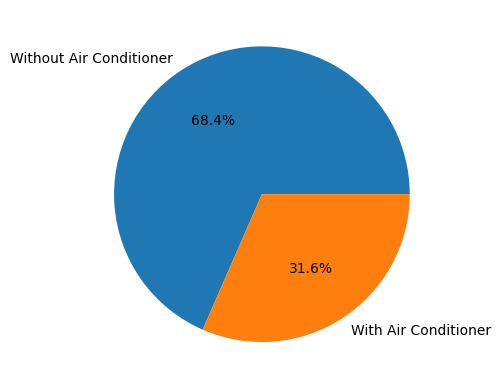

In [30]:
labels = 'Without Air Conditioner', 'With Air Conditioner'
sizes = standard_data['airconditioning'].value_counts()

print(sizes)

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

#### Observation 
- 68% of the houses doesn't have Air Conditioner
- 32% of the houses doe have Air Conditioner

guestroom
0    448
1     97
Name: count, dtype: int64


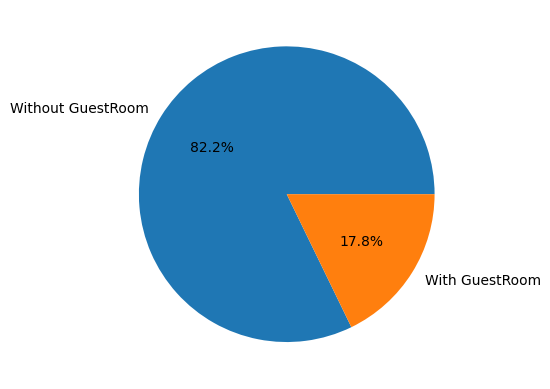

In [31]:
labels = 'Without GuestRoom', 'With GuestRoom'
sizes = standard_data['guestroom'].value_counts()

print(sizes)

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

#### Observation
- 82% of the houses comes without a guestroom
- 18% of the houses comes with a guestroom

basement
0    354
1    191
Name: count, dtype: int64


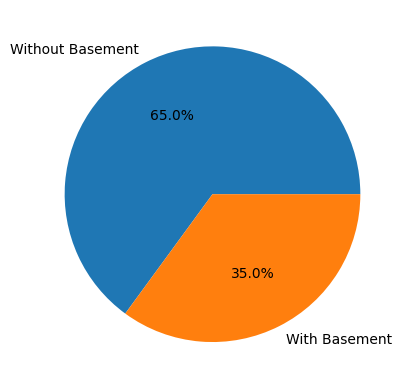

In [32]:
labels = 'Without Basement', 'With Basement'
sizes = standard_data['basement'].value_counts()

print(sizes)

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

#### Observation 
- 65% of the houses doesn't have basement
- 35% of the houses has basement

hotwaterheating
0    520
1     25
Name: count, dtype: int64


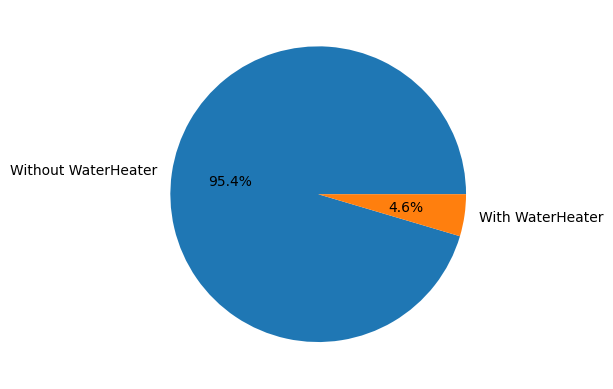

In [26]:
labels = 'Without WaterHeater', 'With WaterHeater'
sizes = standard_data['hotwaterheating'].value_counts()

print(sizes)

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

#### Observation
- 95% of the houses doesn't have a WaterHeater
- Only 4% of the house comes with WaterHeater

mainroad
1    468
0     77
Name: count, dtype: int64


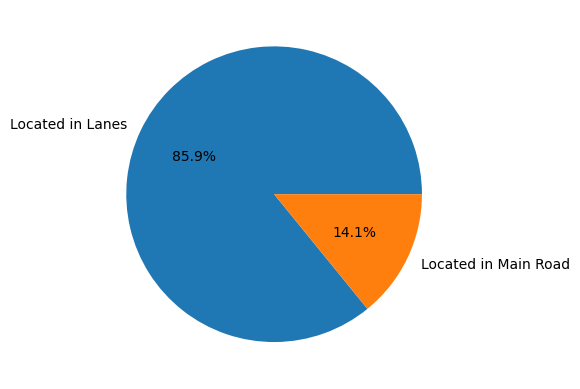

In [27]:
labels = 'Located in Lanes', 'Located in Main Road'
sizes = standard_data['mainroad'].value_counts()

print(sizes)

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

#### Observation
- 86% of the houses are located near main road
- 14% of the houses aren't located near main road

<Axes: xlabel='area', ylabel='price'>

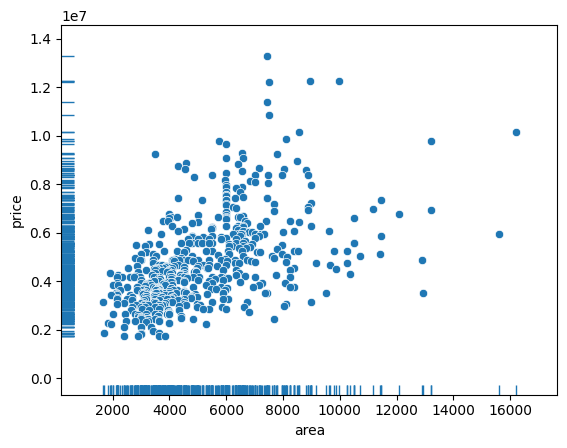

In [11]:
import seaborn as sns
sns.scatterplot(data=df, x="area", y="price")
sns.rugplot(data=df, x="area", y="price")

#### Observation
- The increase in area increases the price
- Some houses with smaller sqft leans towards higher price
- While some houses with larger sqft leans towards lesser price
- The area around 1.0 - 5.0 (price) and 2200 - 5000 sqft are overcrowded and can be assumed that this range is the most selling point, since more houses are suited in this range and customers would lean towards purchasing houses within this range

#### Outliners or Considerable Data ?
- We could consider datapoint such as a propertys in 7900 sqft costs 1.3 to 1.6 crores as considerable data.
- These points, while on the higher end of the price range for their area, are not necessarily outliers because they fall within the general trend of increasing price with increasing area.
- They are simply at the higher end of the distribution.

<Axes: xlabel='price', ylabel='bedrooms'>

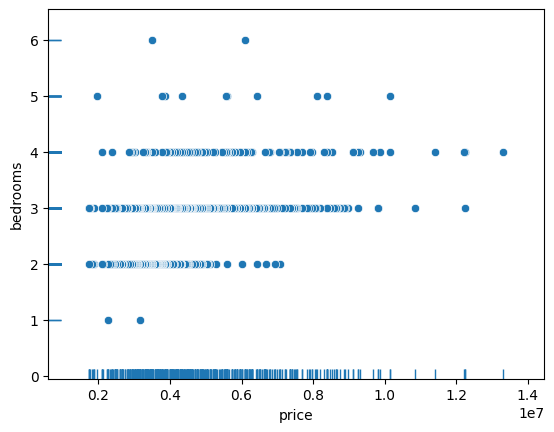

In [12]:
import seaborn as sns

sns.scatterplot(data=df,x='price',y='bedrooms')
sns.rugplot(data=df,x='price',y='bedrooms')

#### Observation
- Densily populated houses are 3 bedroom houses
- Followed by 4 bedroom houses
- Then by 2 bedroom houses
- Two 6 bedroom houses are outliners

#### Inference
- Houses with 2 bedrooms are ranging from 1 crore to 5.7 crore
- 3 bedroom houses ranging from 1 crore to 9 crore

<Axes: xlabel='price', ylabel='bathrooms'>

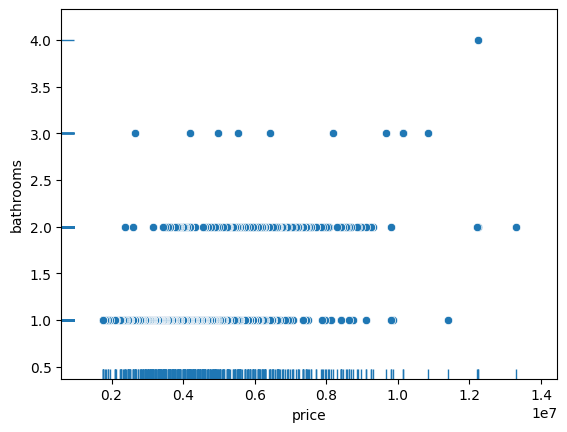

In [13]:
sns.scatterplot(data=df,x='price',y='bathrooms')
sns.rugplot(data=df,x='price',y='bathrooms')

#### Observation
- We have only one house with 4 bathroom which can be considered as outliner
- Most densely populated are houses with 1 and 2 bathrooms

<Axes: xlabel='price', ylabel='stories'>

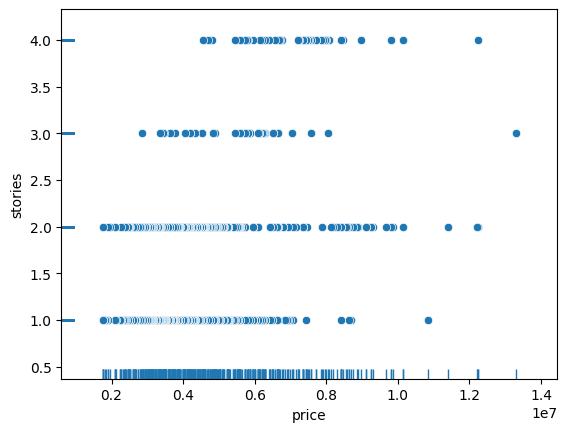

In [14]:
sns.scatterplot(data=df,x='price',y='stories')
sns.rugplot(data=df,x='price',y='stories')

#### Observation
- 2 storied building are the most.
- Then, we have 1 storied building.

In [28]:
standard_data.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,-0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,-0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,-0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.082972
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,-0.133123
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,-0.099023
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,-0.117935
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,-0.059194
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.094086
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.131234,-0.165705


#### Observation
*Higher Co-relation with Price*
 1. Area has higher co-relation with price
 2. Bathroom has higher co-relation with price
 3. Stories have high co-relation with price

*Lower Co-relation with Price*
 1. Bedroom has lower co-relation with price
 2. Mainroad has co-relation lesser than bedroom with price
 3. Guestroom has co-relation lesser than mainroad with price
 4. Basement has co-relation lesser than Guestroom with price

*Significant Analysis*
 1. Parking has higher linear relationship with price **compared to** Prefarea
 2. **furnishingstatus_unfurnished** is prefectly non-linear and isn't co-related with price

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Observation
- Categorical data aren't converted to numercial features

In [4]:
#Traget Data
target_data = df['price']

In [5]:
#Without target data
df = df.drop('price',axis=1)

#### Avoid Data Leakage
- To avoid data leakage, we shall split that data with features and target variable

In [6]:
#New dataframe 
data = df

#Storing the features with categorical data
x = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

#Mapping the values
for column in x:
    data[column] = data[column].map({'yes':1,'no':0})

In [7]:
data.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


- Categorical data except furnishingstatus is converted as numerical features

In [8]:
dummy_data = pd.get_dummies(data,columns=['furnishingstatus'], dtype=int)

In [9]:
#Dropping furnishingstatus_semi-furnished to avoid multicolinearnity
dummy_data = dummy_data.drop('furnishingstatus_semi-furnished',axis=1)

In [10]:
dummy_data.head(6)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0
5,7500,3,3,1,1,0,1,0,1,2,1,0,0


- Converted the furnishingstatus to numerical feature and dropped one column to avoid multicollinearity

In [24]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   area                          545 non-null    int64
 1   bedrooms                      545 non-null    int64
 2   bathrooms                     545 non-null    int64
 3   stories                       545 non-null    int64
 4   mainroad                      545 non-null    int64
 5   guestroom                     545 non-null    int64
 6   basement                      545 non-null    int64
 7   hotwaterheating               545 non-null    int64
 8   airconditioning               545 non-null    int64
 9   parking                       545 non-null    int64
 10  prefarea                      545 non-null    int64
 11  furnishingstatus_furnished    545 non-null    int32
 12  furnishingstatus_unfurnished  545 non-null    int32
dtypes: int32(2), int64(11)
memory usage

In [25]:
dummy_data.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.326606
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.469402
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


### Observation
- Price and area has higher values while rest of the features are between 1-6
- This could make the predictive model be lesser accurate
- Thus, we need to standard encode it to have the values around the same ⛵

##### Standard Encoding v/s Min Max Encoding 
 Which one to apply for area ?

 - **Standard Distribution:** If the data is standard distribution and we don't want the model to pick the outliners, we can consider Stanadrd Encoding
 - **Min Max Encoding:** If one was to preserve the data distribution, shall as maintain the small and large values in dataset, we can use min-max encoding which encodes within [0,1]
   
   Within 0 means smaller data
   
   Above 0 means larger data

##### Is area a normal distribution ?

<Axes: xlabel='area', ylabel='Count'>

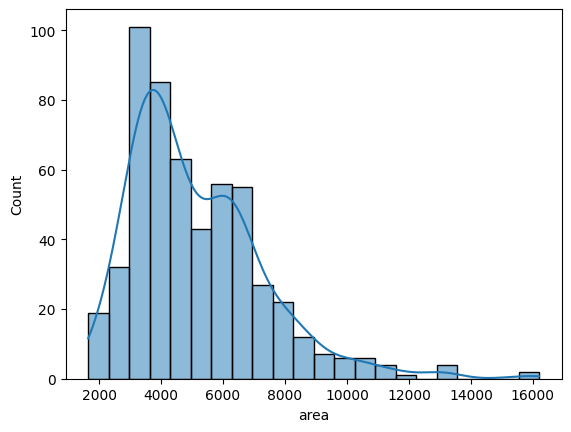

In [26]:
sns.histplot(data=df['area'],kde=True)

#### Observation
- The distribution is right skewed

In [14]:
#non standard features
non_standard_feature = ['area']

non_standard_features = ['bedrooms','bathrooms','stories','mainroad','guestroom']

#Importing the necessary dependancies
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

for features in non_standard_features:
    dummy_data[features] = mms.fit_transform(dummy_data[[features]])

standard_data = dummy_data

standard_data.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,7420,0.6,0.333333,0.666667,1.0,0.0,0,0,1,2,1,1,0
1,8960,0.6,1.000000,1.000000,1.0,0.0,0,0,1,3,0,1,0
2,9960,0.4,0.333333,0.333333,1.0,0.0,1,0,0,2,1,0,0
3,7500,0.6,0.333333,0.333333,1.0,0.0,1,0,1,3,1,1,0
4,7420,0.6,0.000000,0.333333,1.0,1.0,1,0,1,2,0,1,0


### Observation
- Encoded the features (Standard Encoding)
- I have not performed the statistical analysis on features which were categorical before

#### Statistical Analysis

In [43]:
#Mainroad
with_mainroad = standard_data[standard_data['mainroad']==1]['mainroad']
without_main_road = standard_data[standard_data['mainroad']==0]['mainroad']

#Guestroom
with_guest_room = standard_data[standard_data['guestroom']==1]['guestroom']
without_guest_room = standard_data[standard_data['guestroom']==0]['guestroom']

#WaterHeating
with_water_heating = standard_data[standard_data['hotwaterheating']==1]['hotwaterheating']
without_water_heating = standard_data[standard_data['hotwaterheating']==0]['hotwaterheating']

#AirConditioning
with_air_conditioning = standard_data[standard_data['airconditioning']==1]['airconditioning']
without_air_condtioning = standard_data[standard_data['airconditioning']==0]['airconditioning']

#Prefarea
with_pref_area =  standard_data[standard_data['prefarea']==1]['prefarea']
with_pref_area =  standard_data[standard_data['prefarea']==0]['prefarea']

#Reference
# x = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [44]:
from scipy.stats import ttest_ind

#Helper Function
def student_ttest(x,y):
    stats,p_value = ttest_ind(x,y)
    return stats,p_value

def percentage_score(x, y, z):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Check for zero means to avoid divide by zero
    if y_mean == 0:
        print("Warning: y_mean is zero, leading to divide by zero issue.")
        return float('inf')  # Return infinity or handle as needed

    if z < 0.05:
        return ((x_mean - y_mean) / y_mean) * 100
    else:
        return ((x_mean - y_mean) / x_mean) * 100


##### Hypothesis Testing

In [45]:
#H0: Main road doesn't influences the house pricing

stats,pvalue = student_ttest(with_mainroad,without_main_road)

if pvalue < 0.05:
    print(f'Houses situated near main roads are costlier by compared to that of the houses in lane')
else:
    print('Main roads are not influencing factor')

Houses situated near main roads are costlier by compared to that of the houses in lane


C:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [46]:
#H0:Guest rooms doesn't influences the house pricing

stats,pvalue = student_ttest(with_guest_room,without_guest_room)

percentagescore = percentage_score
if pvalue < 0.05:
    print('Houses with guest rooms are costlier')
else:
    print('Houses without guest rooms are cheaper')

Houses with guest rooms are costlier


In [47]:
#H0:Hot Water Heating doesn't influences the house pricing

stats,pvalue = student_ttest(with_water_heating,without_water_heating)

if pvalue < 0.05:
    print('Houses with water heater are costlier')
else:
    print('Houses without water heater are cheaper')

Houses with water heater are costlier


In [48]:
#H0:Houses with air conditioner doesn't influences the house pricing

stats,pvalue = student_ttest(with_air_conditioning,without_air_condtioning)

if pvalue < 0.05:
    print('Houses with air conditioner are costlier')
else:
    print('Houses without air conditioner are cheaper')

Houses with air conditioner are costlier


In [49]:
print(f"with_air_conditioning: {with_air_conditioning.count()}")
print(f"without_air_conditioning: {without_air_condtioning.count()}")

with_air_conditioning: 172
without_air_conditioning: 373


In [50]:
#H0:Houses located in prefarable areas doesn't influences the house pricing

stats,pvalue = student_ttest(with_pref_area,with_pref_area)

if pvalue < 0.05:
    print('Houses are costlier in preferred locations')
else:
    print('Houses are not costlier in preferred locations')

Houses are not costlier in preferred locations


##### Visualizing Price v/s Numerical Features

<Axes: xlabel='mainroad', ylabel='price'>

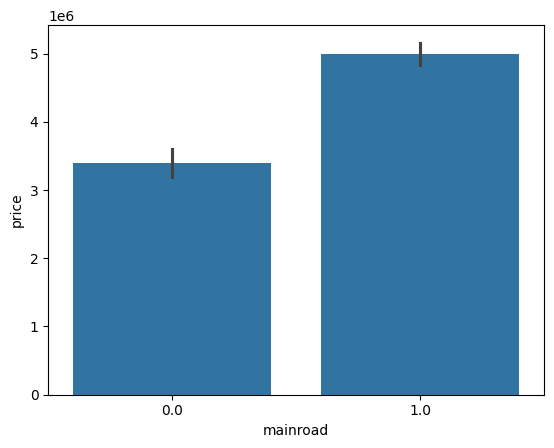

In [51]:
import seaborn as sns

sns.barplot(x='mainroad',y=target_data,data=standard_data,legend = 'auto')

#### Re-Assurance
- Houses in lanes are cheaper than houses in main road
- There are more houses near the lanes rather than main road

<Axes: xlabel='guestroom', ylabel='price'>

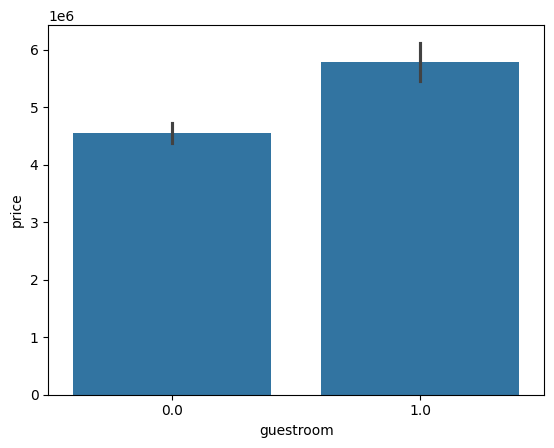

In [52]:
sns.barplot(y=target_data,x='guestroom',data=standard_data)

#### Re-Assurance
- Houses without guestroom are cheaper than houses with guestroom
- Houses available with guestroom are comparatively more than houses without guestroom

<Axes: xlabel='hotwaterheating', ylabel='price'>

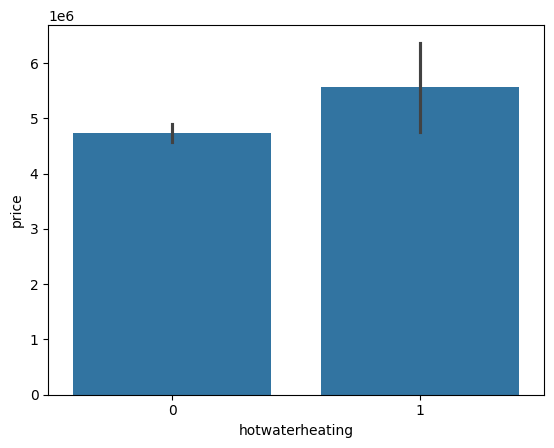

In [53]:
sns.barplot(y=target_data,x='hotwaterheating',data=standard_data)

#### Re-Assurance
- Houses without hot water heater are cheaper than houses with hotwater heater
- Houses available without hot water heater are comparatively less than houses with hot water heater

<Axes: xlabel='airconditioning', ylabel='price'>

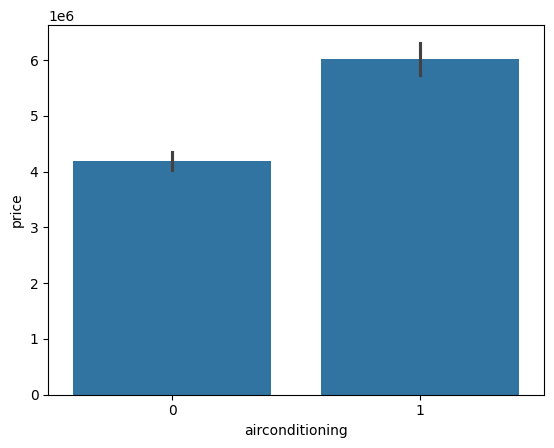

In [54]:
sns.barplot(y=target_data,x='airconditioning',data=standard_data)

#### Re-Assurance
- Houses without air conditioner are cheaper than houses with air conditioner

<Axes: xlabel='prefarea', ylabel='price'>

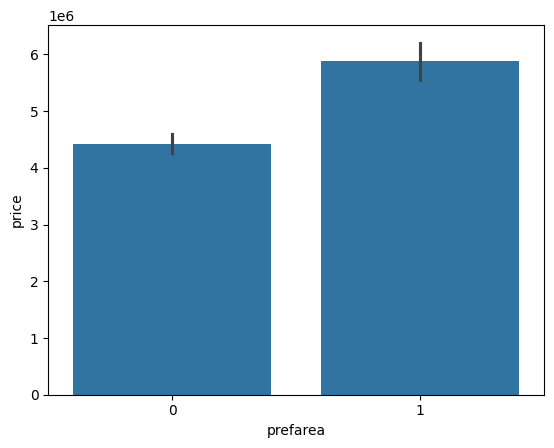

In [55]:
sns.barplot(y=target_data,x='prefarea',data=standard_data)

#### Re-Assurance
- Houses not located in preferencial area are cheaper than houses located in preferencial area

#### Modelling

- Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression(fit_intercept=True)

In [15]:
X = standard_data

In [16]:
y = target_data

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.score(X_train,y_train)

0.6728497453554538

In [24]:
lr.score(X_test,y_test)

0.695648929123241

In [26]:
import statsmodels.api as sm 

In [27]:
#Add Intercept
new_data = standard_data

new_data = sm.add_constant(new_data)
# Train the OLS model
ols_model = sm.OLS(target_data,new_data).fit()

# Display the summary of the OLS model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.07e-123
Time:                        16:24:03   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(standard_data, target_data)

print("Best alpha:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best alpha: {'alpha': 0.1}


In [61]:
rl = Ridge(fit_intercept=True,alpha=0.1)

In [62]:
rl.fit(X_train,y_train)

Ridge(alpha=0.1)

In [63]:
rl.score(X_train,y_train)

0.6728436666617668

In [64]:
rl.fit(X_test,y_test)

Ridge(alpha=0.1)

In [65]:
rl.score(X_test,y_test)

0.7495021272015823

**Residual Analysis**

In [39]:
y_pred_train = lr.predict(standard_data)

In [40]:
# Calculate residuals
residuals = target_data - y_pred_train

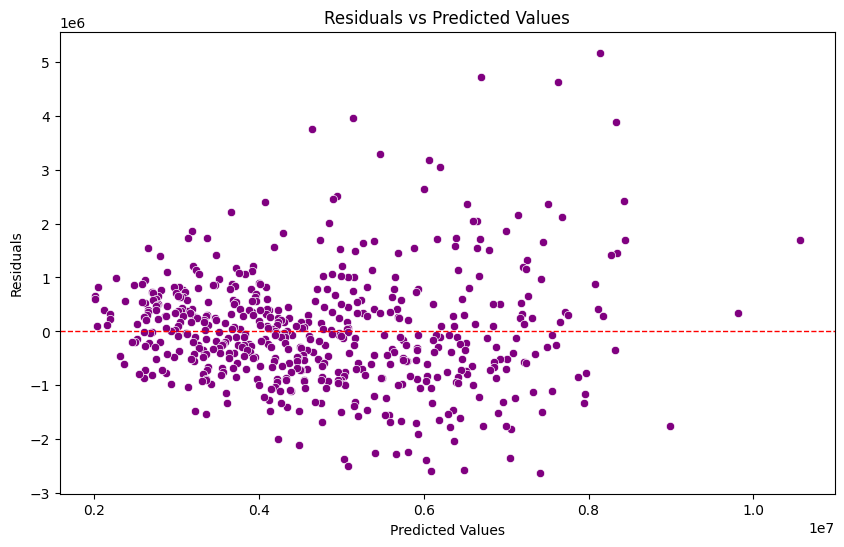

In [41]:
# 2. Residuals vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_train, y=residuals, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Observations

**No Obvious Curvature:** There isn't a clear curved pattern in the residuals. This is good, as it suggests that the relationship between your features and the target variable is reasonably linear. If there were a distinct curve, it would indicate that a linear model isn't appropriate.

**Possible Heteroscedasticity (Non-constant Variance):** There's a slight suggestion of heteroscedasticity. The spread of the residuals seems to increase somewhat as the predicted values increase. This means that the variance of the errors is not constant across the range of predicted values. This is a common issue in regression analysis.

**Some Outliers:** There are a few points that are quite far from the horizontal zero line, especially some larger positive residuals. These could be considered outliers and might be influencing the model.

In [40]:
from sklearn.model_selection import learning_curve

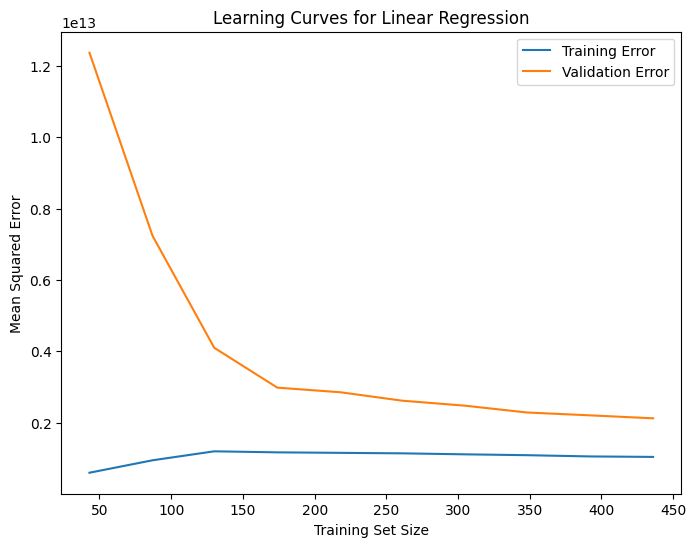

In [45]:
#Define learning curve function
train_sizes,train_scores,test_scores = learning_curve(
    lr,standard_data,target_data,train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of scores
train_scores_mean = -train_scores.mean(axis=1)  # Convert back to positive MSE
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Linear Regression')
plt.legend()
plt.show()

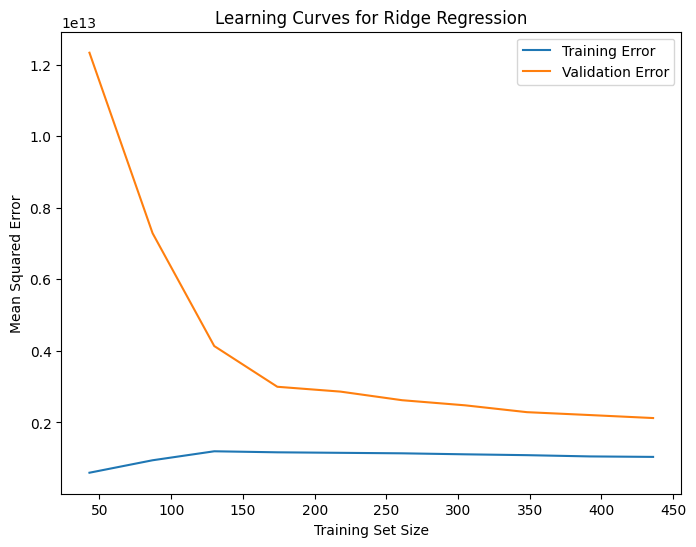

In [53]:
#Define learning curve function
train_sizes,train_scores,test_scores = learning_curve(
    rl,standard_data,target_data,train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of scores
train_scores_mean = -train_scores.mean(axis=1)  # Convert back to positive MSE
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Ridge Regression')
plt.legend()
plt.show()

### Conclusion